<xarray.Dataset> Size: 181MB
Dimensions:        (longitude: 360, latitude: 180, altitude_ft: 50, time: 1)
Coordinates:
  * longitude      (longitude) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude       (latitude) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * altitude_ft    (altitude_ft) float64 400B 500.0 1.5e+03 ... 4.95e+04
  * time           (time) datetime64[ns] 8B 2019-01-31
Data variables:
    seg_length_km  (longitude, latitude, altitude_ft, time) float64 26MB ...
    fuel_burn      (longitude, latitude, altitude_ft, time) float64 26MB ...
    nox            (longitude, latitude, altitude_ft, time) float64 26MB ...
    co             (longitude, latitude, altitude_ft, time) float64 26MB ...
    hc             (longitude, latitude, altitude_ft, time) float64 26MB ...
    nvpm_mass      (longitude, latitude, altitude_ft, time) float64 26MB ...
    nvpm_number    (longitude, latitude, altitude_ft, time) float64 26MB ...

Data variables:
    seg_length_km  (longitude, latitude, altitude_ft, time) float64 26MB ...
    fuel_burn      (longitude, latitude, altitude_ft, time) float64 26MB ...
    nox            (longitude, latitude, altitude_ft, time) float64 26MB ...
    co             (longitude, latitude, altitude_ft, time) float64 26MB ...
    hc             (longitude, latitude, altitude_ft, time) float64 26MB ...
    nvpm_mass      (longitude, latitude, altitude_ft, time) float64 26MB ...
    nvpm_number    (longitude, latitude, altitude_ft, time) float64 26MB ...


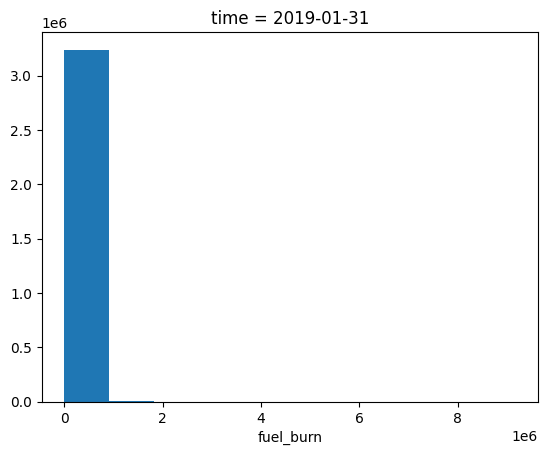

In [1]:
import xarray as xr
from matplotlib import pyplot as plt

file_path = r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\2019-01-monthly.nc"

xrds = xr.open_dataset(file_path)
display(xrds)
# print(xrds.attrs)
# dimensios = xrds.dims
# 
# 
# coords = xrds.coords
# 
data_vars = xrds.data_vars
print(data_vars)
# 
fuel= xrds['fuel_burn']
fuel.plot()
plt.show()
# 
# xrds['emi_air_mass'].plot()
# plt.show()
# h2o = data_vars['H2O'].values
# air = data_vars['emi_air_mass'].values
# q = data_vars['H2O'].values / data_vars['emi_air_mass'].values
# q.plot()
# plt.show()

           time  latitude  tropopause height [km]  \
0   754704000.0     -90.0                 9.16566   
1   754704000.0     -89.7                 9.16487   
2   754704000.0     -89.4                 9.16436   
3   754704000.0     -89.1                 9.16192   
4   754704000.0     -88.8                 9.15712   
..          ...       ...                     ...   
95  754704000.0     -61.5                 8.99862   
96  754704000.0     -61.2                 9.01508   
97  754704000.0     -60.9                 9.03334   
98  754704000.0     -60.6                 9.05331   
99  754704000.0     -60.3                 9.07574   

    tropopause pressure (mean) [hPa]  
0                            268.408  
1                            268.408  
2                            268.408  
3                            268.520  
4                            268.737  
..                               ...  
95                           289.155  
96                           288.911  
97          

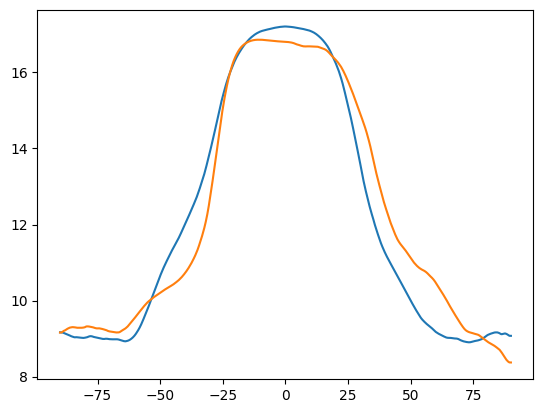

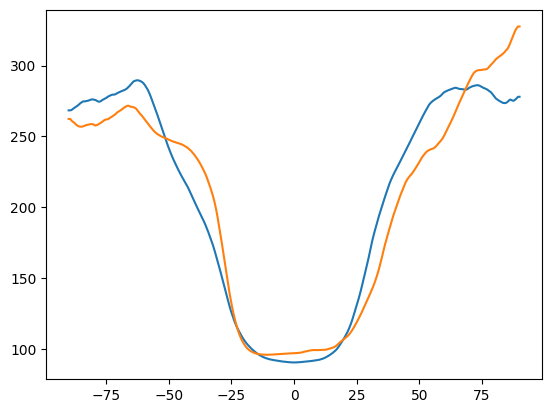

In [66]:
import pandas as pd

# Data from : https://acp.copernicus.org/articles/22/4019/2022/#Ch1.S3.SS8
#             https://datapub.fz-juelich.de/slcs/tropopause/data/projects/zonal_mean/era5/era5_dyn_2023_12.tab

# Read the tab-delimited file
df12 = pd.read_csv(r"C:\Users\atzeh\Downloads\era5_dyn_2023_12.tab", header=None, sep=" ", comment='#')
df12 = df12.rename(columns={
    0: 'time',
    1: 'latitude', 
    2: 'tropopause height [km]', 
    3: 'tropopause pressure (mean) [hPa]'
})
tropopause12 = df12.drop(columns=[4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
# Show the first few rows
print(tropopause12.head(100))

df6 = pd.read_csv(r"C:\Users\atzeh\Downloads\era5_dyn_2023_06.tab", header=None, sep=" ", comment='#')
df6 = df6.rename(columns={
    0: 'time',
    1: 'latitude', 
    2: 'tropopause height [km]', 
    3: 'tropopause pressure (mean) [hPa]'
})
tropopause6 = df6.drop(columns=[4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
# Show the first few rows
print(tropopause6)


plt.plot(tropopause12['latitude'], tropopause12['tropopause height [km]'])
plt.plot(tropopause6['latitude'], tropopause6['tropopause height [km]'])
plt.show()
plt.plot(tropopause12['latitude'], tropopause12['tropopause pressure (mean) [hPa]'])
plt.plot(tropopause6['latitude'], tropopause6['tropopause pressure (mean) [hPa]'])
plt.show()

In [2]:
import xarray as xr
from matplotlib import pyplot as plt

file_path = r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\emi_inv_2020_DEPA.nc"

xrds = xr.open_dataset(file_path)
display(xrds)

<xarray.Dataset> Size: 24MB
Dimensions:   (index: 606169)
Coordinates:
  * index     (index) int64 5MB 0 1 2 3 4 ... 606164 606165 606166 606167 606168
Data variables:
    lon       (index) float32 2MB ...
    lat       (index) float32 2MB ...
    plev      (index) float32 2MB ...
    fuel      (index) float32 2MB ...
    CO2       (index) float32 2MB ...
    H2O       (index) float32 2MB ...
    NOx       (index) float32 2MB ...
    distance  (index) float32 2MB ...
Attributes:
    Title:           inventory_example
    Convention:      CF-XXX
    Inventory_Year:  2020
    Reference:       Based on DEPA 2050 data
    URL:             https://elib.dlr.de/142185/

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Load the dataset
ds = xr.load_dataset("emi_inv_2020_DEPA.nc")

# Extract relevant data
lat = ds['lat'].values
lon = ds['lon'].values
co2 = ds['CO2'].values

# Define grid size
lat_bins = np.arange(-90, 91, 1)   # 1-degree latitude bins
lon_bins = np.arange(0, 361, 1) # 1-degree longitude bins

# Bin the data
heatmap, yedges, xedges = np.histogram2d(
    lat, lon, bins=[lat_bins, lon_bins], weights=co2
)

# Plotting
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
mesh = ax.pcolormesh(
    xedges, yedges, heatmap, cmap='viridis', shading='auto',
    transform=ccrs.PlateCarree()
)
ax.coastlines()
ax.set_title("Global CO₂ Emissions Heatmap (2020, DEPA)", fontsize=14)
cbar = plt.colorbar(mesh, orientation='vertical', pad=0.05)
cbar.set_label("CO₂ Emissions (kg)")
plt.tight_layout()
plt.show()

<xarray.DataArray 'NOx' (index: 606169)> Size: 2MB
array([55783.51 ,  9833.619,  3897.256, ...,  1956.834,   467.057,
         467.057], dtype=float32)
Coordinates:
  * index    (index) int64 5MB 0 1 2 3 4 ... 606164 606165 606166 606167 606168
Attributes:
    long_name:  NOx
    units:      kg

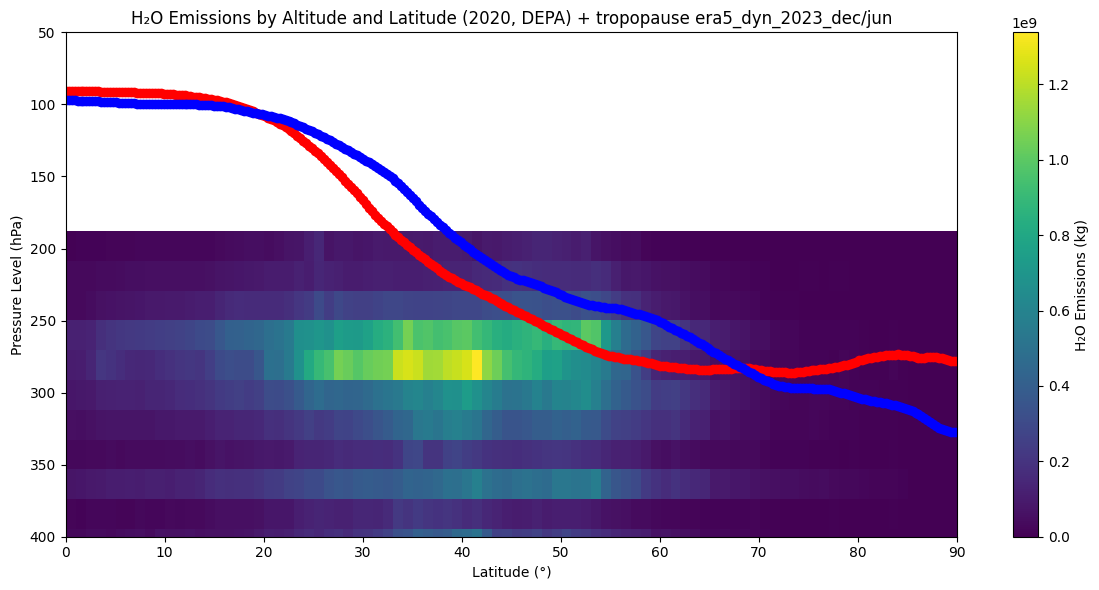

In [82]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Load NetCDF dataset
ds = xr.open_dataset("emi_inv_2020_DEPA.nc")

# Extract relevant variables
lat = ds['lat'].values
plev = ds['plev'].values  # pressure level in hPa (altitude proxy)
h2o = ds['H2O'].values

# Define bin edges
lat_bins = np.arange(-90, 91, 1)                # Latitude from -90° to 90°
plev_bins = np.unique(plev) #np.linspace(plev.min(), plev.max(), 100)  # Pressure bins

# Create 2D histogram (Y=plev, X=lat)
heatmap, plev_edges, lat_edges = np.histogram2d(
    plev, lat, bins=[plev_bins, lat_bins], weights=h2o
)

# Plotting
plt.figure(figsize=(12, 6))
plt.title("H₂O Emissions by Altitude and Latitude (2020, DEPA) + tropopause era5_dyn_2023_dec/jun")
plt.xlabel("Latitude (°)")
plt.ylabel("Pressure Level (hPa)")

# Show the image
plt.imshow(
    heatmap,
    aspect='auto',
    origin='lower',
    extent=[lat_bins[0], lat_bins[-1], plev_bins[0], plev_bins[-1]],
    cmap='viridis',
    # norm=colors.LogNorm()
)

# Invert y-axis: higher altitude (lower pressure) at the top
plt.gca().invert_yaxis()

# Regulate axes of plot
plt.xlim(0, 90)      
plt.ylim(400, 50)

# Add colorbar
plt.colorbar(label="H₂O Emissions (kg)")
plt.tight_layout()
plt.scatter(tropopause12['latitude'][300:], tropopause12['tropopause pressure (mean) [hPa]'][300:], color='red')
plt.scatter(tropopause6['latitude'][300:], tropopause6['tropopause pressure (mean) [hPa]'][300:], color='blue')

plt.show()


In [77]:
heatmap[0:40]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
len(plev_bins)


41

506.3
217.3
239.1
572.1
446.8
572.1
549.4
329.9
506.3
942.14
217.3
262.6
197.5
278.0
288.1
485.8
207.1
315.4
301.9
262.6
278.0
217.3
619.6
288.1
197.5
572.1
315.4
239.1
977.17
250.6
781.9
239.1
696.9
393.2
466.0
410.4
843.1
843.1
843.1
942.14
207.1
188.2
188.2
446.8
428.3
393.2
595.5
644.6
262.6
197.5
329.9
239.1
301.9
644.6
217.3
428.3
572.1
197.5
446.8
1013.25
250.6
301.9
329.9
410.4
410.4
275.1
217.3
329.9
942.1
250.6
572.1
908.1
446.8
275.1
188.2
262.6
301.9
527.5
752.7
393.2
466.0
239.1
278.0
466.0
288.1
262.6
572.1
410.4
315.4
466.0
466.0
301.9
446.8
549.4
977.17
278.0
428.3
275.1
843.1
752.7
1013.25 188.2
[ 188.2   197.5   207.1   217.3   239.1   250.6   262.6   275.1   278.
  288.1   301.9   315.4   329.9   344.9   360.4   376.5   393.2   410.4
  428.3   446.8   466.    485.8   506.3   527.5   549.4   572.1   595.5
  619.6   644.6   670.3   696.9   724.4   752.7   781.9   812.    843.1
  908.1   942.1   942.14  977.17 1013.25]
41


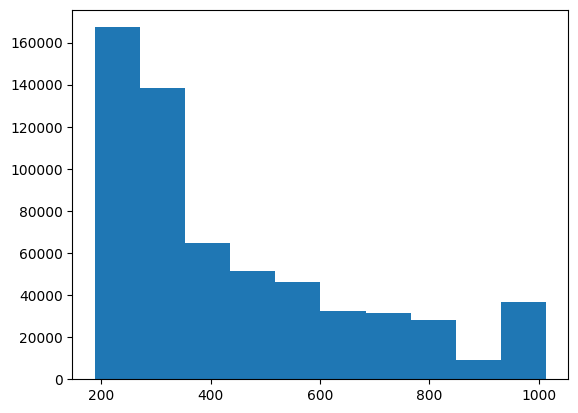

In [5]:
for i in range(len(plev)):
    if i == 100:
        break
    print(plev[i])
print(max(plev), min(plev))
print(plev_bins)
plt.hist(plev)
pleva = np.unique(plev)
print(len(pleva))

           time  latitude  tropopause height [km]  \
0   754704000.0     -90.0                 9.16566   
1   754704000.0     -89.7                 9.16487   
2   754704000.0     -89.4                 9.16436   
3   754704000.0     -89.1                 9.16192   
4   754704000.0     -88.8                 9.15712   
..          ...       ...                     ...   
95  754704000.0     -61.5                 8.99862   
96  754704000.0     -61.2                 9.01508   
97  754704000.0     -60.9                 9.03334   
98  754704000.0     -60.6                 9.05331   
99  754704000.0     -60.3                 9.07574   

    tropopause pressure (mean) [hPa]  
0                            268.408  
1                            268.408  
2                            268.408  
3                            268.520  
4                            268.737  
..                               ...  
95                           289.155  
96                           288.911  
97          

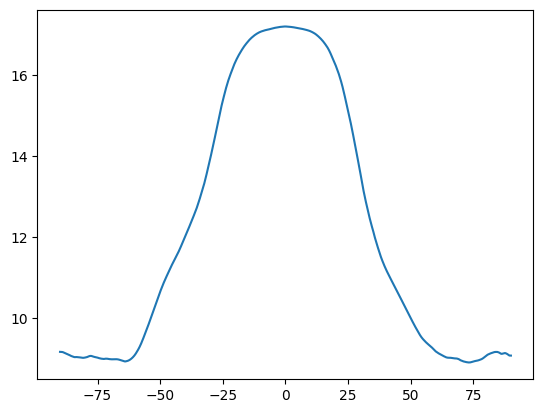

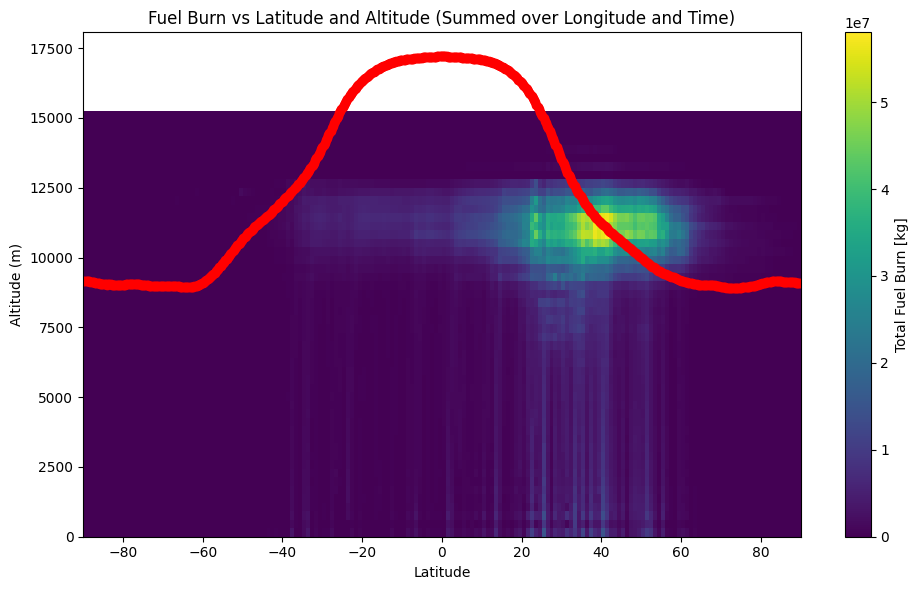

In [47]:
import xarray as xr
from matplotlib import pyplot as plt

file_path = r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\2019-01-monthly.nc"

xrds = xr.open_dataset(file_path)
# display(xrds)
# print(xrds.attrs)
# dimensios = xrds.dims
# 
# 
# coords = xrds.coords
# 
data_vars = xrds.data_vars
# print(data_vars)
# 
fuel= xrds['fuel_burn']
# fuel.plot()
# plt.show()
# 
# xrds['emi_air_mass'].plot()
# plt.show()
# h2o = data_vars['H2O'].values
# air = data_vars['emi_air_mass'].values
# q = data_vars['H2O'].values / data_vars['emi_air_mass'].values
# q.plot()
# plt.show()


"""box plot, summed over longitude"""
fuel_burn_sum = xrds['fuel_burn'].sum(dim=['longitude', 'time'])
# Step 2: Plot
plt.figure(figsize=(10, 6))
# Transpose to put altitude on y-axis and latitude on x-axis
alt_m = xrds['altitude_ft']*0.3048
pcm = plt.pcolormesh(
    xrds['latitude'], alt_m, fuel_burn_sum.transpose(),
    shading='auto', cmap='viridis'
)

plt.colorbar(pcm, label='Total Fuel Burn [kg]')
plt.xlabel('Latitude')
plt.ylabel('Altitude (m)')
plt.title('Fuel Burn vs Latitude and Altitude (Summed over Longitude and Time)')
plt.tight_layout()
plt.scatter(tropopause['latitude'], tropopause['tropopause height [km]']*1000, color='red')
plt.show()

<xarray.DataArray 'fuel_burn' (longitude: 360, latitude: 180)> Size: 518kB
array([[   0.        ,    0.        ,    0.        , ..., 1569.53760027,
        1028.55182432,  852.68907485],
       [   0.        ,    0.        ,    0.        , ..., 1350.92199561,
        1745.5797794 ,  606.62778968],
       [   0.        ,    0.        ,    0.        , ..., 1181.05966079,
        2131.95383565,  624.25425283],
       ...,
       [   0.        ,    0.        ,    0.        , ..., 1167.50979283,
        1751.99124974,  603.53219731],
       [   0.        ,    0.        ,    0.        , ..., 1526.94684906,
        1334.69872823,  752.35089352],
       [   0.        ,    0.        ,    0.        , ..., 1057.09053592,
        1837.61716644,  451.4986329 ]])
Coordinates:
  * longitude  (longitude) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude   (latitude) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5

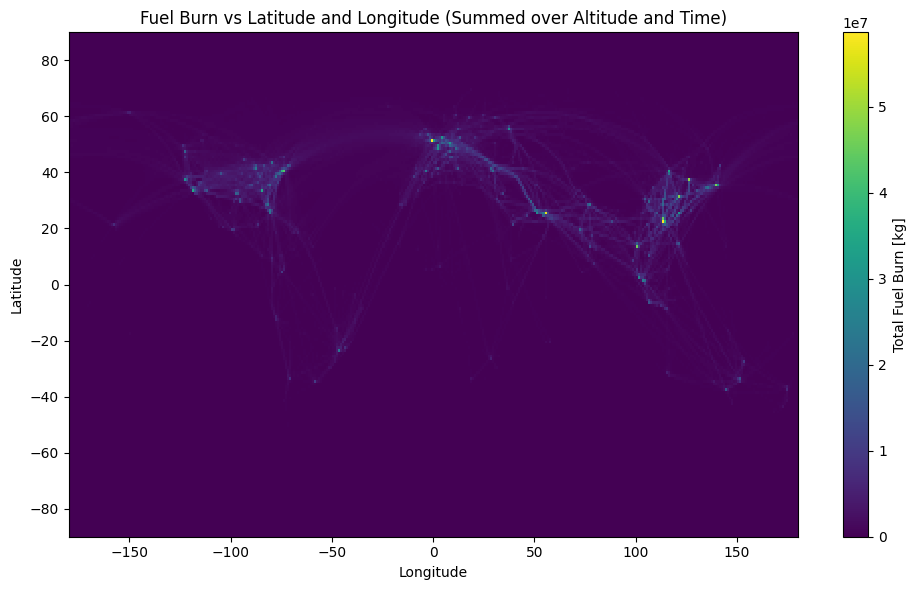

In [7]:
"""box plot, summed over altitude"""
fuel_burn_alt_sum = xrds['fuel_burn'].sum(dim=['altitude_ft', 'time'])
display(fuel_burn_alt_sum)
plt.figure(figsize=(10, 6))
pcm = plt.pcolormesh(
    xrds['longitude'], xrds['latitude'], fuel_burn_alt_sum.transpose('latitude', 'longitude'),
    shading='auto', cmap='viridis'
)
plt.colorbar(pcm, label='Total Fuel Burn [kg]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fuel Burn vs Latitude and Longitude (Summed over Altitude and Time)')
plt.tight_layout()
plt.show()

In [8]:
fuel_burn_alt_sum = xrds['fuel_burn'].sum(dim=['altitude_ft', 'time'])

print(fuel_burn_alt_sum.shape)            # Should be (lat, lon)
print(xrds['latitude'].shape)           # Should match fuel_burn_sum's first dimension
print(xrds['longitude'].shape)          # Should match fuel_burn_sum's second dimension

(360, 180)
(180,)
(360,)


In [9]:
# path = r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\example\input\rnd_inv_2030.nc"
# import xarray as xr
# from matplotlib import pyplot as plt
# 
# xr_example = xr.open_dataset(path)
# xr_example['NOx'].values
# display(xr_example)

In [10]:
import xarray as xr
rand_inv = r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\example\input\rnd_inv_2020.nc"
DEPA_2020 = r"C:\Users\atzeh\PycharmProjects\OAC_Thesis\ATZE\emi_inv_2020_DEPA.nc"
xr_rand = xr.open_dataset(rand_inv)
xr_depa = xr.open_dataset(DEPA_2020)
display(xr_depa)
display(xr_rand)

<xarray.Dataset> Size: 24MB
Dimensions:   (index: 606169)
Coordinates:
  * index     (index) int64 5MB 0 1 2 3 4 ... 606164 606165 606166 606167 606168
Data variables:
    lon       (index) float32 2MB ...
    lat       (index) float32 2MB ...
    plev      (index) float32 2MB ...
    fuel      (index) float32 2MB ...
    CO2       (index) float32 2MB ...
    H2O       (index) float32 2MB ...
    NOx       (index) float32 2MB ...
    distance  (index) float32 2MB ...
Attributes:
    Title:           inventory_example
    Convention:      CF-XXX
    Inventory_Year:  2020
    Reference:       Based on DEPA 2050 data
    URL:             https://elib.dlr.de/142185/

<xarray.Dataset> Size: 400kB
Dimensions:   (index: 10000)
Coordinates:
  * index     (index) int64 80kB 0 1 2 3 4 5 6 ... 9994 9995 9996 9997 9998 9999
Data variables:
    lon       (index) float32 40kB ...
    lat       (index) float32 40kB ...
    plev      (index) float32 40kB ...
    fuel      (index) float32 40kB ...
    CO2       (index) float32 40kB ...
    H2O       (index) float32 40kB ...
    NOx       (index) float32 40kB ...
    distance  (index) float32 40kB ...
Attributes:
    Title:           Artificial emission inventory
    Convention:      CF-XXX
    Inventory_Year:  2020

In [11]:
import xarray as xr
trial_nc = r'C:\Users\atzeh\PycharmProjects\OAC_Thesis\example\results\trial.nc'
nc = xr.open_dataset(trial_nc)
display(nc)
# print(nc['AGWP_10_2020'].values)

<xarray.Dataset> Size: 10kB
Dimensions:        (ac: 2, time: 31)
Coordinates:
  * time           (time) int32 124B 2020 2021 2022 2023 ... 2047 2048 2049 2050
  * ac             (ac) <U7 56B 'DEFAULT' 'TOTAL'
Data variables: (12/20)
    emis_CO2       (ac, time) float64 496B ...
    emis_distance  (ac, time) float64 496B ...
    emis_H2O       (ac, time) float64 496B ...
    emis_NOx       (ac, time) float64 496B ...
    conc_CH4       (ac, time) float64 496B ...
    conc_CO2       (ac, time) float64 496B ...
    ...             ...
    dT_CO2         (ac, time) float64 496B ...
    dT_cont        (ac, time) float64 496B ...
    dT_H2O         (ac, time) float64 496B ...
    dT_O3          (ac, time) float64 496B ...
    dT_PMO         (ac, time) float64 496B ...
    dT_SWV         (ac, time) float64 496B ...
Attributes:
    title:        trial
    created:      2025-09-05 14:05:51
    user:         atzeh
    oac version:  0.11.1

In [12]:
nc.data_vars
nc.coords['time'].values
# a = nc['RF_SWV'][0].values
# print(a)
# nc['conc_CH4'][0].plot()
# plt.show()

array([2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030,
       2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041,
       2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050])

In [13]:
from IPython.display import HTML
import xarray as xr

ds = xr.open_dataset(trial_nc)
HTML(ds._repr_html_())

In [14]:
ds['total']

KeyError: "No variable named 'total'. Variables on the dataset include ['emis_CO2', 'emis_distance', 'emis_H2O', 'emis_NOx', 'conc_CH4', ..., 'dT_O3', 'dT_PMO', 'dT_SWV', 'time', 'ac']"

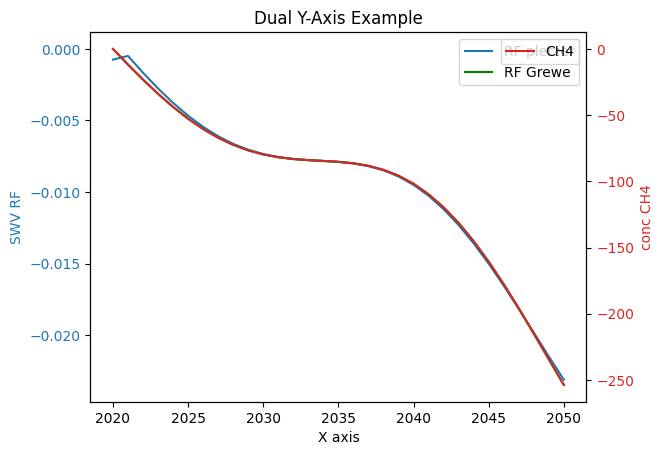

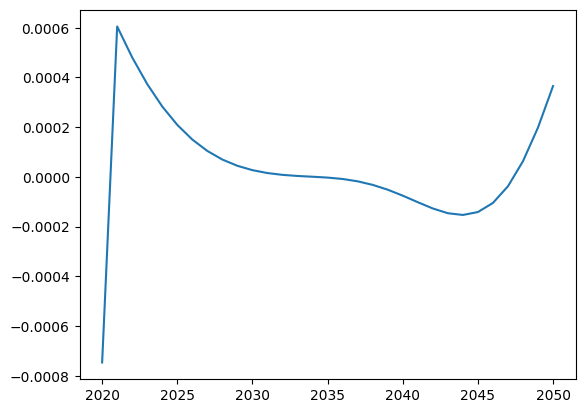

array([-7.46760000e-04,  6.05281919e-04,  4.80687619e-04,  3.73450815e-04,
        2.83205476e-04,  2.09282689e-04,  1.50269248e-04,  1.04385012e-04,
        6.97577742e-05,  4.46229130e-05,  2.70912550e-05,  1.54606528e-05,
        8.18356111e-06,  3.76535672e-06,  6.63134795e-07, -2.78564467e-06,
       -8.37013040e-06, -1.78393243e-05, -3.20732262e-05, -5.15014574e-05,
       -7.54515916e-05, -1.01822225e-04, -1.27030921e-04, -1.46132256e-04,
       -1.53129460e-04, -1.41483910e-04, -1.04807423e-04, -3.77030923e-05,
        6.32989195e-05,  1.98783430e-04,  3.65562221e-04])

In [15]:
# Example data
import numpy as np
import matplotlib.pyplot as plt
x = nc.coords['time'].values
# np.linspace(0, 10, 100)
y1 = nc['RF_SWV'][0].values          # first dataset (larger scale)
y2 = nc['conc_CH4'][0].values          # second dataset (smaller scale)
# GREWE way of RF calc
y3 = nc['conc_CH4'][0].values * 0.21129757195261092 * 4.38*10**-4 
# Create the figure and first axis
fig, ax1 = plt.subplots()

# Plot the first dataset on ax1
color = 'tab:blue'
ax1.set_xlabel('X axis')
ax1.set_ylabel('SWV RF', color=color)
ax1.plot(x, y1, color=color, label='RF pletzer')
ax1.plot(x, y3, color="green", label='RF Grewe')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend()

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('conc CH4', color=color)
ax2.plot(x, y2, color=color, label='CH4')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend()

# Show plot
plt.title("Dual Y-Axis Example")

plt.show()

plt.plot(x, y1-y3)
plt.show()
y1-y3

In [18]:
tropo = r"C:\Users\atzeh\Downloads\era5_2024_01_01.nc"
import xarray as xr

tro = xr.open_dataset(tropo)
tro.data_vars

Data variables:
    clp_z       (time, lat, lon) float32 69MB ...
    clp_p       (time, lat, lon) float32 69MB ...
    clp_t       (time, lat, lon) float32 69MB ...
    clp_q       (time, lat, lon) float32 69MB ...
    clp_o3      (time, lat, lon) float32 69MB ...
    dyn_z       (time, lat, lon) float32 69MB ...
    dyn_p       (time, lat, lon) float32 69MB ...
    dyn_t       (time, lat, lon) float32 69MB ...
    dyn_q       (time, lat, lon) float32 69MB ...
    dyn_o3      (time, lat, lon) float32 69MB ...
    wmo_1st_z   (time, lat, lon) float32 69MB ...
    wmo_1st_p   (time, lat, lon) float32 69MB ...
    wmo_1st_t   (time, lat, lon) float32 69MB ...
    wmo_1st_q   (time, lat, lon) float32 69MB ...
    wmo_1st_o3  (time, lat, lon) float32 69MB ...
    wmo_2nd_z   (time, lat, lon) float32 69MB ...
    wmo_2nd_p   (time, lat, lon) float32 69MB ...
    wmo_2nd_t   (time, lat, lon) float32 69MB ...
    wmo_2nd_q   (time, lat, lon) float32 69MB ...
    wmo_2nd_o3  (time, lat, lon) f

           time  latitude  tropopause height [km]  \
0   754704000.0     -90.0                 9.16566   
1   754704000.0     -89.7                 9.16487   
2   754704000.0     -89.4                 9.16436   
3   754704000.0     -89.1                 9.16192   
4   754704000.0     -88.8                 9.15712   
..          ...       ...                     ...   
95  754704000.0     -61.5                 8.99862   
96  754704000.0     -61.2                 9.01508   
97  754704000.0     -60.9                 9.03334   
98  754704000.0     -60.6                 9.05331   
99  754704000.0     -60.3                 9.07574   

    tropopause pressure (mean) [hPa]  
0                            268.408  
1                            268.408  
2                            268.408  
3                            268.520  
4                            268.737  
..                               ...  
95                           289.155  
96                           288.911  
97          

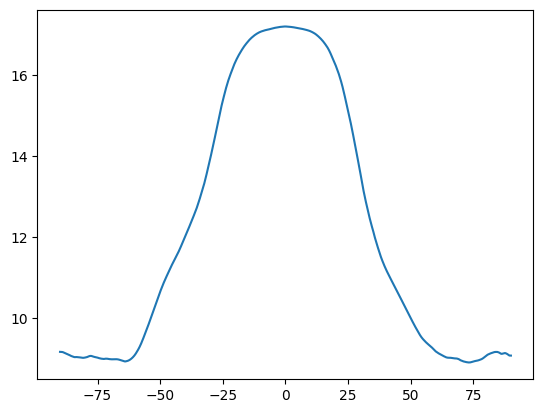

In [37]:
import pandas as pd

# Read the tab-delimited file
df = pd.read_csv(r"C:\Users\atzeh\Downloads\era5_dyn_2023_12.tab", header=None, sep=" ", comment='#')
df = df.rename(columns={
    0: 'time',
    1: 'latitude', 
    2: 'tropopause height [km]', 
    3: 'tropopause pressure (mean) [hPa]'
})
df = df.drop(columns=[4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
# Show the first few rows
print(df.head(100))

plt.plot(df['latitude'], df['tropopause height [km]'])
plt.show()

In [30]:
df[0][0]



754704000.0